In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import traceback

In [2]:
def prepareImg(img, height):
    "convert given image to grayscale image (if needed) and resize to desired height"
    h = img.shape[0]
    factor = height / h
    return cv.resize(img, dsize=None, fx=factor, fy=factor)

In [75]:
img = (cv.imread('seg_words/img_42.png'))

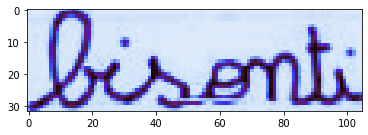

In [76]:
plt.imshow(img, cmap='gray')

In [77]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th, letterGray = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)

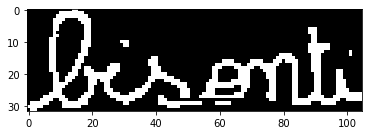

In [78]:
plt.imshow(letterGray, cmap='gray')

In [79]:
letterGray.shape

(32, 105)

In [80]:
h = letterGray.shape[0]
w = letterGray.shape[1]

In [81]:
# normalize image pixel in range [0,1]

letterGray = letterGray/255

In [82]:
def average_col(pc):
    
    sp = []
    s = 0
    n = 0
    flag = False
    # compute average between closed black columns
    for i in range(len(pc)-1):
    
        if(pc[i+1]-pc[i] <= 3):

            s += pc[i]
            n += 1

            if(i == len(pc)-2):
                flag = True
                s += pc[i+1]
                n += 1
                sp.append(s//n)
        else:
            if(n>0):
                sp.append(s//n)
                n = 0
                s = 0
            else:                
                sp.append(pc[i])
                
    if not flag and sp!=[]:
        sp.append(pc[-1])
        
    return sp

In [83]:
def find_black_col(letterGray):
    """
    Find columns with all pixel black (background)
    from a binary inverted image; average closed columns;
    remove columns which are more closed than a threshold
    
    img: a binary inverted image with normalized pixel
    
    return a list with indexs of black columns
    """
    bc = []
    # sum each column pixel 
    col = np.sum(letterGray==0, axis=0)
    # save index of black columns
    black_col = np.where(col==h)
    black_col = black_col[0]
    
    bc = average_col(black_col)
        
    return bc

In [84]:
bc = find_black_col(letterGray)

In [85]:
bc

[]

In [86]:
THRESH1 = 8
THRESH2 = 4

In [87]:
def char_seg(a,b):
    """
    a: int
        start point
    b: int
        end point   
        
    return a list of potential segmentation points
    """
        
    col = np.sum(letterGray==1,axis=0)
    psp = []
    sp = []
    
    for i in range(a, b-1):
        
        if col[i+1]-col[i] >= THRESH2:

            psp.append(i)
    
    sp = average_col(psp)
            
    return sp

In [88]:
new_col = []
no_black_col = False

if(bc!=[]):
    
    if(bc[0]==0):
        bc.remove(0)
    
    if(bc!=[] and bc[-1]==w-1):
        bc.remove(w-1)
    
    if(bc!=[] and bc[0] < THRESH1):

        bc.remove(bc[0])

    for i in range(len(bc)-1):

        if(i==0):

            if(bc[i] > THRESH1):

                new_col.append(char_seg(0, bc[i]))
        
        if(bc[i+1]-bc[i] > THRESH1):

            new_col.append(char_seg(bc[i], bc[i+1]))
            
    if(bc!=[] and (w-1)-bc[-1] > THRESH1):

        new_col.append(char_seg(bc[-1],w))
        
    if(len(bc)==1):
        
        new_col.append(char_seg(0,bc[0]))
        new_col.append(char_seg(bc[0],w-1))
        
else:
    
    no_black_col = True
    
    new_col.append(char_seg(0, w-1))

In [89]:
bc

[]

In [90]:
new_sp = []
    
for i in range(len(new_col)):

    for x in new_col[i]:

        new_sp.append(x)
        
if(new_sp!=[]):
    
    new_sp = (sorted(list(set(new_sp))))
    

    if(new_sp[0] < THRESH1):
        
        new_sp.remove(new_sp[0])
    
if(new_sp!=[]):
    
    if((w-1)-new_sp[-1] < THRESH2):
        
        new_sp.remove(new_sp[-1])

In [91]:
final_col = []
b = False

for i in range(len(new_sp)):
    
    b = False
    
    for j in range(len(bc)):
        
        if(abs(bc[j]-new_sp[i]) < THRESH1):
            
            b=True
            
    if(not b):    
        
        final_col.append(new_sp[i])

In [92]:
final_col = final_col+bc

In [93]:
final_col = sorted(set(final_col))

In [94]:
final_col

[17, 57, 74, 82, 87, 96]

In [95]:
bc

[]

In [96]:
new_sp

[17, 57, 74, 82, 87, 96]

In [97]:
im = img.copy()

for i in final_col:
        
    cv.rectangle(img, (i,0), (i,h), (255,255,0))

"""for i in range(len(sp)-1):
    
    currImg = im[:,sp[i]:sp[i+1]]
    
    #elif(i<len(cut)-1):    
    #    currImg = im[:,cut[i]:cut[i+1]]
    cv.imwrite('estratte/letter_img_18_'+str(i)+'.png', currImg)
    plt.figure()
    plt.imshow(currImg, cmap='gray')
"""

"for i in range(len(sp)-1):\n    \n    currImg = im[:,sp[i]:sp[i+1]]\n    \n    #elif(i<len(cut)-1):    \n    #    currImg = im[:,cut[i]:cut[i+1]]\n    cv.imwrite('estratte/letter_img_18_'+str(i)+'.png', currImg)\n    plt.figure()\n    plt.imshow(currImg, cmap='gray')\n"

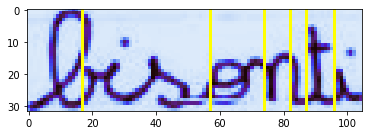

In [98]:
plt.imshow(img, cmap='gray')